In [1]:
from scipy.optimize import curve_fit,least_squares
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#### IMPORTANTE:
### Configurando caminhos:
path_pickles = '/home/andre/Desktop/PCI-INPE/01-relatorio_jan/'
output = '/home/andre/Desktop/PCI-INPE/01-relatorio_jan/'

In [3]:
### Lendo os arquivos .pkl de cada conjunto de horarios e de cada estatística e passando para dataframes:
medias1 = pd.read_pickle(path_pickles+'12_01_24_MEDIAS_1500as1555.pickle')
medias2 = pd.read_pickle(path_pickles+'12_01_24_MEDIAS_1600as1655.pickle')
medias3 = pd.read_pickle(path_pickles+'12_01_24_MEDIAS_1700as1755.pickle')
medias4 = pd.read_pickle(path_pickles+'12_01_24_MEDIAS_1800as1855.pickle')
medias5 = pd.read_pickle(path_pickles+'12_01_24_MEDIAS_1900as1955.pickle')
medias6 = pd.read_pickle(path_pickles+'12_01_24_MEDIAS_2000as2055.pickle')
medias7 = pd.read_pickle(path_pickles+'12_01_24_MEDIAS_2100as2155.pickle')
medias8 = pd.read_pickle(path_pickles+'12_01_24_MEDIAS_2200as2255.pickle')
medias9 = pd.read_pickle(path_pickles+'12_01_24_MEDIAS_2300as2350.pickle')

medianas1 = pd.read_pickle(path_pickles+'12_01_24_MEDIANAS_1500as1555.pickle')
medianas2 = pd.read_pickle(path_pickles+'12_01_24_MEDIANAS_1600as1655.pickle')
medianas3 = pd.read_pickle(path_pickles+'12_01_24_MEDIANAS_1700as1755.pickle')
medianas4 = pd.read_pickle(path_pickles+'12_01_24_MEDIANAS_1800as1855.pickle')
medianas5 = pd.read_pickle(path_pickles+'12_01_24_MEDIANAS_1900as1955.pickle')
medianas6 = pd.read_pickle(path_pickles+'12_01_24_MEDIANAS_2000as2055.pickle')
medianas7 = pd.read_pickle(path_pickles+'12_01_24_MEDIANAS_2100as2155.pickle')
medianas8 = pd.read_pickle(path_pickles+'12_01_24_MEDIANAS_2200as2255.pickle')
medianas9 = pd.read_pickle(path_pickles+'12_01_24_MEDIANAS_2300as2350.pickle')

maximas1 = pd.read_pickle(path_pickles+'12_01_24_MAXIMAS_1500as1555.pickle')
maximas2 = pd.read_pickle(path_pickles+'12_01_24_MAXIMAS_1600as1655.pickle')
maximas3 = pd.read_pickle(path_pickles+'12_01_24_MAXIMAS_1700as1755.pickle')
maximas4 = pd.read_pickle(path_pickles+'12_01_24_MAXIMAS_1800as1855.pickle')
maximas5 = pd.read_pickle(path_pickles+'12_01_24_MAXIMAS_1900as1955.pickle')
maximas6 = pd.read_pickle(path_pickles+'12_01_24_MAXIMAS_2000as2055.pickle')
maximas7 = pd.read_pickle(path_pickles+'12_01_24_MAXIMAS_2100as2155.pickle')
maximas8 = pd.read_pickle(path_pickles+'12_01_24_MAXIMAS_2200as2255.pickle')
maximas9 = pd.read_pickle(path_pickles+'12_01_24_MAXIMAS_2300as2350.pickle')

In [4]:
### Concatenando os dataframes para cada estatística:
final_medias = pd.concat([medias1, medias2, medias3, medias4, medias5, medias6, medias7, medias8, medias9])
final_medianas = pd.concat([medianas1, medianas2, medianas3, medianas4, medianas5, medianas6, medianas7, medianas8, medianas9])
final_maximas = pd.concat([maximas1, maximas2, maximas3, maximas4, maximas5, maximas6, maximas7, maximas8, maximas9])

### Adicionando a coluna com o ln(raio) a cada dataframe:
final_medias['log_raios'] = np.log(final_medias['total_raios'])
final_medianas['log_raios'] = np.log(final_medianas['total_raios'])
final_maximas['log_raios'] = np.log(final_maximas['total_raios'])

In [5]:
#### IMPORTANTE:
### Definindo os limites e o passo de cada bin (em ln(raio)), onde serão calculadas as medianas
lista = list(np.arange(2.0, 5.2, 0.1))

In [6]:
### Criando um dataframe com as medianas (nos bins definidos acima) da refletividade média e o ln dos raios:
lista_intervalos = []
dados = final_medias

for i in range(len(lista)):
    if i == len(lista)-2:
        mask = (dados['log_raios'] >= lista[i]) & (dados['log_raios'] <= lista[i+1])
    elif i < len(lista)-2:
        mask = (dados['log_raios'] >= lista[i]) & (dados['log_raios'] < lista[i+1])
    elif i == len(lista):
        pass
    lista_intervalos.append(dados.loc[mask])

medianas_rs = [np.median(x['refletividade_filtrada_medias']) for x in lista_intervalos]
medianas_logsraios = [np.median(x['log_raios']) for x in lista_intervalos]

dic = {'log_raios': medianas_logsraios, 'r':medianas_rs}
df1 = pd.DataFrame(dic)
df1.dropna(axis='index', inplace=True)

In [7]:
### Criando um dataframe com as medianas (nos bins definidos acima) da refletividade mediana e o ln dos raios:
lista_intervalos = []
dados = final_medianas

for i in range(len(lista)):
    if i == len(lista)-2:
        mask = (dados['log_raios'] >= lista[i]) & (dados['log_raios'] <= lista[i+1])
    elif i < len(lista)-2:
        mask = (dados['log_raios'] >= lista[i]) & (dados['log_raios'] < lista[i+1])
    elif i == len(lista):
        pass
    lista_intervalos.append(dados.loc[mask])

medianas_rs = [np.median(x['refletividade_filtrada_medianas']) for x in lista_intervalos]
medianas_logsraios = [np.median(x['log_raios']) for x in lista_intervalos]

dic = {'log_raios': medianas_logsraios, 'r':medianas_rs}
df2 = pd.DataFrame(dic)
df2.dropna(axis='index', inplace=True)

In [8]:
### Criando um dataframe com as medianas (nos bins definidos acima) da refletividade máxima e o ln dos raios:
lista_intervalos = []
dados = final_maximas

for i in range(len(lista)):
    if i == len(lista)-2:
        mask = (dados['log_raios'] >= lista[i]) & (dados['log_raios'] <= lista[i+1])
    elif i < len(lista)-2:
        mask = (dados['log_raios'] >= lista[i]) & (dados['log_raios'] < lista[i+1])
    elif i == len(lista):
        pass
    lista_intervalos.append(dados.loc[mask])

medianas_rs = [np.median(x['refletividade_filtrada_maximas']) for x in lista_intervalos]
medianas_logsraios = [np.median(x['log_raios']) for x in lista_intervalos]

dic = {'log_raios': medianas_logsraios, 'r':medianas_rs}
df3 = pd.DataFrame(dic)
df3.dropna(axis='index', inplace=True)

### Plotando os pontos (R_média X ln(Numero_Raios)), as medianas nos bins e o ajuste linear associado:

a = 22.448 ± 0.444
b = 2.862 ± 0.116
a = 22.148 ± 0.219
b = 2.978 ± 0.066
R2 = 0.84977894
R22 = 0.29436156


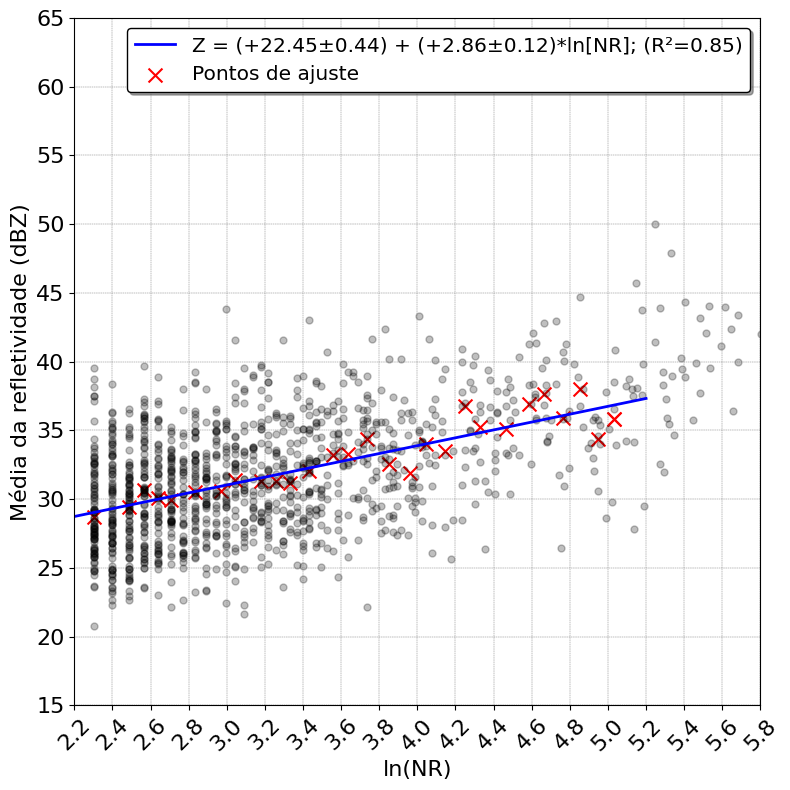

In [9]:
lograios = final_medias['log_raios']
refs = final_medias['refletividade_filtrada_medias']
x_datos = np.array(df1['log_raios'])
y_datos = np.array(df1['r'])
x_datos2 = np.array(lograios)
y_datos2 = np.array(refs)

### Equação da curva que será ajustada:
def modelo(x, a, b):
    return a + (b*x)

### Parâmetros iniciais do ajuste:
parametros_iniciales=[1, 1]

### Fittando a curva:
popt, pcov = curve_fit(modelo, x_datos, y_datos, p0=parametros_iniciales)
popt2, pcov2 = curve_fit(modelo, x_datos2, y_datos2, p0=parametros_iniciales)

#########################################################################  Fazendo o gráfico:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
tf = 16
ax.scatter(x_datos, y_datos, c='red', marker='x', s=100, alpha=1.0, label='Pontos de ajuste')
ax.scatter(lograios, refs, c='k', marker='o', s=25, alpha=0.25)
# ax.set_title("Refletividades médias, CAPPI 6 km", fontsize=tf)

### Incerteza dos parâmetros ajustados:
nombres_de_param = ['a','b']
pstd = np.sqrt(np.diag(pcov))
pstd2 = np.sqrt(np.diag(pcov2))
for i, param in enumerate(popt):
    print('{:s} = {:5.3f} ± {:5.3f}'.format(nombres_de_param[i], param, pstd[i]/2))
for i, param in enumerate(popt2):
    print('{:s} = {:5.3f} ± {:5.3f}'.format(nombres_de_param[i], param, pstd2[i]/2))
ss_res = np.sum( (y_datos-modelo(x_datos,*popt))**2  )
ss_tot = np.sum( (y_datos-np.mean(y_datos))**2  )
ss_res2 = np.sum( (y_datos2-modelo(x_datos2,*popt2))**2  )
ss_tot2 = np.sum( (y_datos2-np.mean(y_datos2))**2  )

### Cálculo do R²:
R2 = 1-(ss_res/ss_tot)
print('R2 = {:10.8f}'.format(R2))
R22 = 1-(ss_res2/ss_tot2)
print('R22 = {:10.8f}'.format(R22))
x_modelo = np.linspace(2.2, 5.2, 1000)
x_modelo2 = np.linspace(2.2, 5.2, 1000)
ax.plot(x_modelo, modelo(x_modelo, *popt), color='blue', linewidth=2,
    label=u'Z = ({:+.2f}±{:.2f}) + ({:+.2f}±{:.2f})*ln[NR]; (R²={:.2f})'.format(popt[0], pstd[0]/2, popt[1],
                                                                                pstd[1]/2, R2))

### Legenda e limites dos eixos:
ax.legend(loc='best', ncol=1, fontsize=tf-1.5, fancybox='True', shadow='True', facecolor='white',
          edgecolor='black')
ax.grid(True, axis='both', zorder=0, linestyle='--', color='dimgray', linewidth=0.3)
ax.set_xlabel('ln(NR)', fontsize=tf)
ax.set_ylabel('Média da refletividade (dBZ)', fontsize=tf)
ax.set(xlim=[2.2, 5.8], ylim=[15, 65], facecolor='white')
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.tick_params(labelsize=tf-1)
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=tf, color='black')
plt.setp(ax.get_yticklabels(), rotation=0, fontsize=tf, color='black')
fig.tight_layout()

### Salvando a figura:
plt.savefig(output+'Ajuste_medias_FCTH.png', bbox_inches='tight', dpi=300)

### Plotando os pontos (R_mediana X ln(Numero_Raios)), as medianas nos bins e o ajuste linear associado:

a = 21.544 ± 0.420
b = 3.104 ± 0.109
a = 21.520 ± 0.248
b = 3.140 ± 0.074
R2 = 0.88153236
R22 = 0.26513844


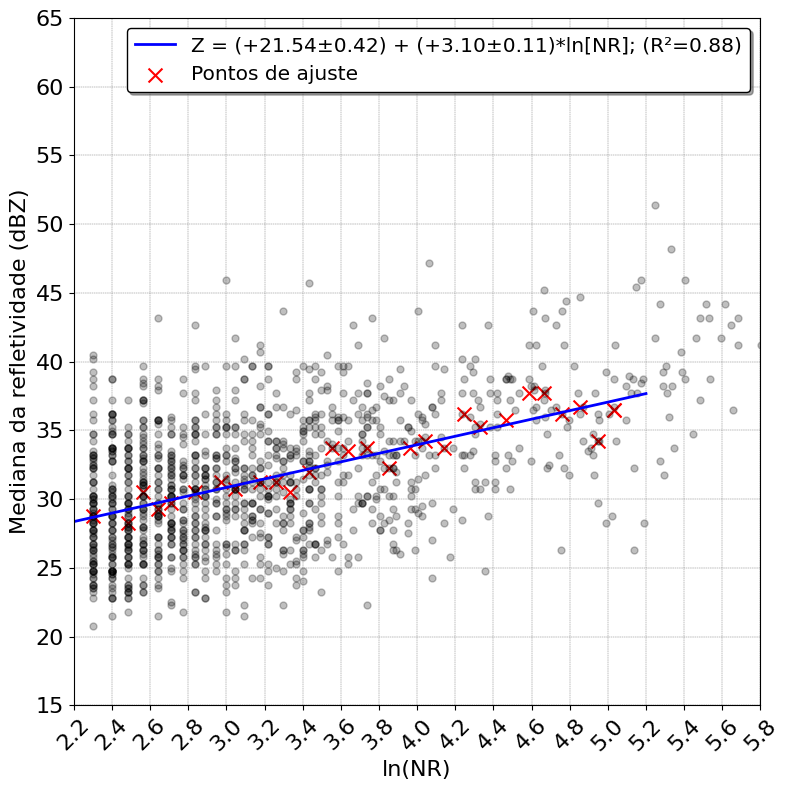

In [10]:
lograios = final_medianas['log_raios']
refs = final_medianas['refletividade_filtrada_medianas']
x_datos = np.array(df2['log_raios'])
y_datos = np.array(df2['r'])
x_datos2 = np.array(lograios)
y_datos2 = np.array(refs)

### Equação da curva que será ajustada:
def modelo(x, a, b):
    return a + (b*x)

### Parâmetros iniciais do ajuste:
parametros_iniciales=[1, 1]

### Fittando a curva:
popt, pcov = curve_fit(modelo, x_datos, y_datos, p0=parametros_iniciales)
popt2, pcov2 = curve_fit(modelo, x_datos2, y_datos2, p0=parametros_iniciales)

#########################################################################  Fazendo o gráfico:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
tf = 16
ax.scatter(x_datos, y_datos, c='red', marker='x', s=100, alpha=1.0, label='Pontos de ajuste')
ax.scatter(lograios, refs, c='k', marker='o', s=25, alpha=0.25)
# ax.set_title("Medianas da refletividade, CAPPI 6 km", fontsize=tf)

### Incerteza dos parâmetros ajustados:
nombres_de_param = ['a','b']
pstd = np.sqrt(np.diag(pcov))
pstd2 = np.sqrt(np.diag(pcov2))
for i, param in enumerate(popt):
    print('{:s} = {:5.3f} ± {:5.3f}'.format(nombres_de_param[i], param, pstd[i]/2))
for i, param in enumerate(popt2):
    print('{:s} = {:5.3f} ± {:5.3f}'.format(nombres_de_param[i], param, pstd2[i]/2))
ss_res = np.sum( (y_datos-modelo(x_datos,*popt))**2  )
ss_tot = np.sum( (y_datos-np.mean(y_datos))**2  )
ss_res2 = np.sum( (y_datos2-modelo(x_datos2,*popt2))**2  )
ss_tot2 = np.sum( (y_datos2-np.mean(y_datos2))**2  )

### Cálculo do R²:
R2 = 1-(ss_res/ss_tot)
print('R2 = {:10.8f}'.format(R2))
R22 = 1-(ss_res2/ss_tot2)
print('R22 = {:10.8f}'.format(R22))
x_modelo  = np.linspace(2.2, 5.2, 1000)
x_modelo2 = np.linspace(2.2, 5.2, 1000)
ax.plot(x_modelo, modelo(x_modelo, *popt), color='blue', linewidth=2,
    label=u'Z = ({:+.2f}±{:.2f}) + ({:+.2f}±{:.2f})*ln[NR]; (R²={:.2f})'.format(popt[0], pstd[0]/2, popt[1],
                                                                                pstd[1]/2, R2))

### Legenda e limites dos eixos:
ax.legend(loc='best', ncol=1, fontsize=tf-1.5, fancybox='True', shadow='True', facecolor='white',
          edgecolor='black')
ax.grid(True, axis='both', zorder=0, linestyle='--', color='dimgray', linewidth=0.3)
ax.set_xlabel('ln(NR)', fontsize=tf)
ax.set_ylabel('Mediana da refletividade (dBZ)', fontsize=tf)
ax.set(xlim=[2.2, 5.8], ylim=[15, 65], facecolor='white')
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.tick_params(labelsize=tf-1)
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=tf, color='black')
plt.setp(ax.get_yticklabels(), rotation=0, fontsize=tf, color='black')
fig.tight_layout()

### Salvando a figura:
plt.savefig(output+'Ajuste_medianas_FCTH.png', bbox_inches='tight', dpi=300)

### Plotando os pontos (R_máxima X ln(Numero_Raios)), as medianas nos bins e o ajuste linear associado:

a = 33.816 ± 0.725
b = 2.934 ± 0.189
a = 32.593 ± 0.387
b = 3.363 ± 0.116
R2 = 0.69028628
R22 = 0.14530509


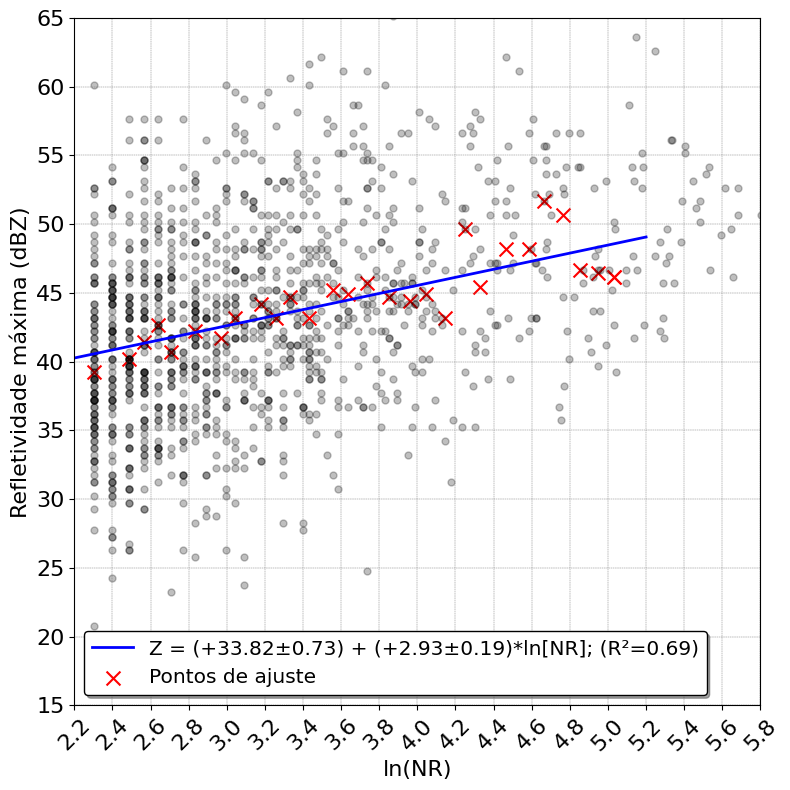

In [11]:
lograios = final_maximas['log_raios']
refs = final_maximas['refletividade_filtrada_maximas']
x_datos = np.array(df3['log_raios'])
y_datos = np.array(df3['r'])
x_datos2 = np.array(lograios)
y_datos2 = np.array(refs)

### Equação da curva que será ajustada:
def modelo(x, a, b):
    return a + (b*x)

### Parâmetros iniciais do ajuste:
parametros_iniciales=[1, 1]

### Fittando a curva:
popt, pcov = curve_fit(modelo, x_datos, y_datos, p0=parametros_iniciales)
popt2, pcov2 = curve_fit(modelo, x_datos2, y_datos2, p0=parametros_iniciales)

#########################################################################  Fazendo o gráfico:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
tf = 16
ax.scatter(x_datos, y_datos, c='red', marker='x', s=100, alpha=1.0, label='Pontos de ajuste')
ax.scatter(lograios, refs, c='k', marker='o', s=25, alpha=0.25)
# ax.set_title("Medianas da refletividade, CAPPI 6 km", fontsize=tf)

### Incerteza dos parâmetros ajustados:
nombres_de_param = ['a','b']
pstd = np.sqrt(np.diag(pcov))
pstd2 = np.sqrt(np.diag(pcov2))
for i, param in enumerate(popt):
    print('{:s} = {:5.3f} ± {:5.3f}'.format(nombres_de_param[i], param, pstd[i]/2))
for i, param in enumerate(popt2):
    print('{:s} = {:5.3f} ± {:5.3f}'.format(nombres_de_param[i], param, pstd2[i]/2))
ss_res = np.sum( (y_datos-modelo(x_datos,*popt))**2  )
ss_tot = np.sum( (y_datos-np.mean(y_datos))**2  )
ss_res2 = np.sum( (y_datos2-modelo(x_datos2,*popt2))**2  )
ss_tot2 = np.sum( (y_datos2-np.mean(y_datos2))**2  )

### Cálculo do R²:
R2 = 1-(ss_res/ss_tot)
print('R2 = {:10.8f}'.format(R2))
R22 = 1-(ss_res2/ss_tot2)
print('R22 = {:10.8f}'.format(R22))
x_modelo  = np.linspace(2.2, 5.2, 1000)
x_modelo2 = np.linspace(2.2, 5.2, 1000)
ax.plot(x_modelo, modelo(x_modelo, *popt), color='blue', linewidth=2,
    label=u'Z = ({:+.2f}±{:.2f}) + ({:+.2f}±{:.2f})*ln[NR]; (R²={:.2f})'.format(popt[0], pstd[0]/2, popt[1],
                                                                                pstd[1]/2, R2))

### Legenda e limites dos eixos:
ax.legend(loc='best', ncol=1, fontsize=tf-1.5, fancybox='True', shadow='True', facecolor='white',
          edgecolor='black')
ax.grid(True, axis='both', zorder=0, linestyle='--', color='dimgray', linewidth=0.3)
ax.set_xlabel('ln(NR)', fontsize=tf)
ax.set_ylabel('Refletividade máxima (dBZ)', fontsize=tf)
ax.set(xlim=[2.2, 5.8], ylim=[15, 65], facecolor='white')
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.tick_params(labelsize=tf-1)
plt.setp(ax.get_xticklabels(), rotation=45, fontsize=tf, color='black')
plt.setp(ax.get_yticklabels(), rotation=0, fontsize=tf, color='black')
fig.tight_layout()

### Salvando a figura:
plt.savefig(output+'Ajuste_maximas_FCTH.png', bbox_inches='tight', dpi=300)